In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('datos_exportados_clean.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [3]:
df

,Fecha,Latitud,Longitud,SST
0,1981-09-01,19.875,-117.125,NaN
1,1981-09-01,20.125,-117.125,NaN
2,1981-09-01,20.375,-117.125,NaN
3,1981-09-01,20.625,-117.125,NaN
4,1981-09-01,20.875,-117.125,NaN
...,...,...,...,...
1319271,2023-12-01,30.875,-104.125,NaN
1319272,2023-12-01,31.125,-104.125,NaN
1319273,2023-12-01,31.375,-104.125,NaN
1319274,2023-12-01,31.625,-104.125,NaN


In [4]:
df.count()

Fecha       1319276
Latitud     1319276
Longitud    1319276
SST          186436
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.count()

Fecha       186436
Latitud     186436
Longitud    186436
SST         186436
dtype: int64

In [7]:
# Filtramos el dataset para la latitud y longitud específica
lat = 22.625
lon = -107.125

df_filtered = df[(df['Latitud'] == lat) & (df['Longitud'] == lon)]

In [8]:
df_filtered

,Fecha,Latitud,Longitud,SST
1971,1981-09-01,22.625,-107.125,28.87767
4568,1981-10-01,22.625,-107.125,28.74871
7165,1981-11-01,22.625,-107.125,26.99600
9762,1981-12-01,22.625,-107.125,25.58290
12359,1982-01-01,22.625,-107.125,23.63032
...,...,...,...,...
1308262,2023-08-01,22.625,-107.125,30.16355
1310859,2023-09-01,22.625,-107.125,30.26433
1313456,2023-10-01,22.625,-107.125,30.42323
1316053,2023-11-01,22.625,-107.125,27.76800


In [232]:
for i in range(1, 13):  # Crear 3 columnas retrasadas como ejemplo
    df_filtered[f'SST_Lag{i}'] = df_filtered['SST'].shift(i)

# Eliminar filas con valores NaN creados por el desplazamiento
df.dropna(inplace=True)

# Configuración de la ventana deslizante
window_size = 48
prediction_step = 12
train_start = 0
train_end = train_start + window_size
# Predicciones
predictions = []
actual = []


C:\Users\52341\AppData\Local\Temp\ipykernel_11032\243470570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'SST_Lag{i}'] = df_filtered['SST'].shift(i)


In [233]:
df_filtered

,Fecha,Latitud,Longitud,SST,SST_Lag1,SST_Lag2,SST_Lag3,SST_Lag4,SST_Lag5,SST_Lag6,SST_Lag7,SST_Lag8,SST_Lag9,SST_Lag10,SST_Lag11,SST_Lag12
1971,1981-09-01,22.625,-107.125,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,1981-10-01,22.625,-107.125,28.74871,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7165,1981-11-01,22.625,-107.125,26.99600,28.74871,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9762,1981-12-01,22.625,-107.125,25.58290,26.99600,28.74871,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12359,1982-01-01,22.625,-107.125,23.63032,25.58290,26.99600,28.74871,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308262,2023-08-01,22.625,-107.125,30.16355,29.06064,27.30500,26.03871,23.84967,23.02097,22.23750,23.75677,25.15903,27.65600,29.73290,30.01700,30.33581
1310859,2023-09-01,22.625,-107.125,30.26433,30.16355,29.06064,27.30500,26.03871,23.84967,23.02097,22.23750,23.75677,25.15903,27.65600,29.73290,30.01700
1313456,2023-10-01,22.625,-107.125,30.42323,30.26433,30.16355,29.06064,27.30500,26.03871,23.84967,23.02097,22.23750,23.75677,25.15903,27.65600,29.73290
1316053,2023-11-01,22.625,-107.125,27.76800,30.42323,30.26433,30.16355,29.06064,27.30500,26.03871,23.84967,23.02097,22.23750,23.75677,25.15903,27.65600


In [234]:

while train_end + prediction_step - 1 < len(df):
    # Datos de entrenamiento y prueba
    train_data = df_filtered.iloc[train_start:train_end]
    test_data = df_filtered.iloc[train_end:train_end + prediction_step]  # Cambio aquí para incluir 6 días en el futuro

    # Asegurarse de que estamos en el rango de fechas deseado (2020-2023)
    if test_data['Fecha'].dt.year.values[0] < 2015:
        train_start += 1
        train_end += 1
        continue
    if test_data['Fecha'].dt.year.values[0] > 2019:
        break

    # Características y variable objetivo
    features = [f'SST_Lag{i}' for i in range(1, 13)]
    X_train = train_data[features]
    y_train = train_data['SST']
    X_test = test_data[features]

    # Entrenamiento del modelo
    model = RandomForestRegressor(n_estimators=50)
    model.fit(X_train, y_train)

    # Predicción para los próximos 6 días
    pred = model.predict(X_test)
    predictions.append(pred[0])  # Agregar la predicción del sexto día a la lista
    actual.append(test_data['SST'].values[0])  # Agregar el valor real del sexto día a la lista

    # Mover la ventana
    train_start += 1
    train_end += 1


In [235]:
predictions

[23.152917,
 24.3854116,
 24.049076999999993,
 24.2990064,
 26.762167999999996,
 28.796656199999997,
 29.213887200000016,
 29.4715118,
 29.844560199999997,
 28.883693400000002,
 27.86544079999999,
 25.458833999999996,
 24.0694642,
 24.317270800000003,
 24.289458599999993,
 24.946366400000006,
 26.092572999999998,
 28.435799600000006,
 29.670146400000007,
 30.17654419999998,
 30.289578799999976,
 30.01300059999999,
 28.115812999999985,
 26.4146742,
 24.444871000000003,
 24.228727599999992,
 23.943494200000004,
 24.160099999999993,
 25.521924199999997,
 28.12939140000001,
 29.676370199999994,
 29.706938000000005,
 29.87072359999999,
 30.084821199999983,
 29.944955599999986,
 27.161732799999996,
 24.357048999999996,
 24.235948199999992,
 24.307874000000005,
 23.807394000000002,
 24.210652199999995,
 26.348935199999996,
 29.519363399999992,
 29.768199799999994,
 29.399785599999994,
 29.60631379999998,
 29.131000399999998,
 25.87275900000001,
 24.181143199999994,
 24.2519668,
 23.534658,
 2

In [236]:
pred

array([26.6107348, 24.4835738, 23.695919 , 22.9522412, 23.5315924,
       23.8904556, 26.0621238, 29.097592 , 29.7682768, 30.1006946,
       29.570995 , 29.5172086])

In [237]:

resultados = pd.DataFrame({
    'Prediccion_SST': predictions
})
        

In [238]:
resultados.to_csv("output_rndForestDoceMeses.csv", index=False)

df_adjust = df_filtered[(df_filtered["Fecha"] >= '2015-01-01') & (df_filtered['Fecha'] < '2020-01-01')]

df_adjust = df_adjust.reset_index(drop=True)

df_adjust = pd.DataFrame(df_adjust)

In [239]:
df_adjust.to_csv('FechasCompararDoceMeses.csv', index=False)

In [240]:
mse = mean_squared_error(actual, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.7330422288370925


In [241]:
resultados = pd.read_csv("output_rndForestDoceMeses.csv")
# Asumiendo que data['SST'] son tus observaciones reales y y_ts_pred son tus predicciones.
df_adjust = pd.read_csv('FechasCompararDoceMeses.csv')

In [242]:
resultados.insert(0, 'Fecha', df_adjust['Fecha'])

print((resultados))
"""# Convertir año y mes a una fecha (primer día de cada mes)
sst_promedio_mensual['Fecha'] = pd.to_datetime(sst_promedio_mensual['Año'].astype(str) + '-' +
                                               sst_promedio_mensual['Mes'].astype(str) + '-01')
"""
df_adjust['Fecha'] = pd.to_datetime(df_adjust['Fecha'])
resultados['Fecha'] = pd.to_datetime(resultados['Fecha'])


         Fecha  Prediccion_SST
0   2015-01-01       23.152917
1   2015-02-01       24.385412
2   2015-03-01       24.049077
3   2015-04-01       24.299006
4   2015-05-01       26.762168
5   2015-06-01       28.796656
6   2015-07-01       29.213887
7   2015-08-01       29.471512
8   2015-09-01       29.844560
9   2015-10-01       28.883693
10  2015-11-01       27.865441
11  2015-12-01       25.458834
12  2016-01-01       24.069464
13  2016-02-01       24.317271
14  2016-03-01       24.289459
15  2016-04-01       24.946366
16  2016-05-01       26.092573
17  2016-06-01       28.435800
18  2016-07-01       29.670146
19  2016-08-01       30.176544
20  2016-09-01       30.289579
21  2016-10-01       30.013001
22  2016-11-01       28.115813
23  2016-12-01       26.414674
24  2017-01-01       24.444871
25  2017-02-01       24.228728
26  2017-03-01       23.943494
27  2017-04-01       24.160100
28  2017-05-01       25.521924
29  2017-06-01       28.129391
30  2017-07-01       29.676370
31  2017

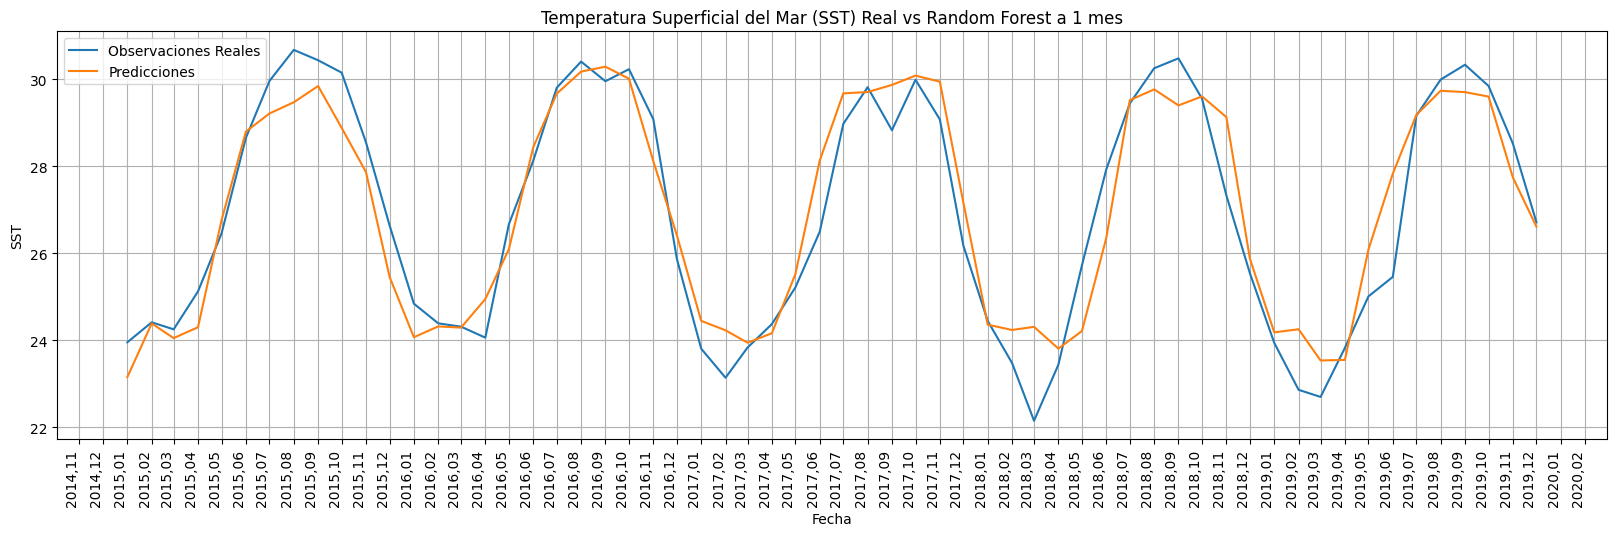

In [243]:
# Gráfico
plt.figure(figsize=(20, 6))
plt.plot(df_adjust['Fecha'], df_adjust['SST'],linestyle='-', label='Observaciones Reales')
plt.plot(df_adjust['Fecha'], resultados['Prediccion_SST'],  linestyle='-', label='Predicciones')
plt.title('Temperatura Superficial del Mar (SST) Real vs Random Forest a 1 mes')
plt.xlabel('Fecha')
plt.ylabel('SST')
plt.legend()

# Formatear el eje x para mostrar cada año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y,%m'))
plt.gcf().autofmt_xdate()  # Auto-rotar las fechas para que sean legibles
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [244]:
meanPred = np.mean(np.abs(resultados['Prediccion_SST']))

In [245]:
meanReal = np.mean(np.abs(df_adjust['SST']))

In [246]:
print("Error promedio de la temperatura predicha", meanPred)
print("Error promedio de la temperatura real", meanReal)
print(np.abs(meanReal-meanPred))

Error promedio de la temperatura predicha 26.97433692333333
Error promedio de la temperatura real 26.913928499999997
0.06040842333333174
